In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.preprocessing import StandardScaler,RobustScaler

from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor

In [2]:
data = pd.read_csv('fulldf_hourly.csv')
data.head()

,AssetID,FullDate,Date,Reading_Imp,Time,tempC,windspeedKmph,winddirDegree,precipMM,humidity,...,20HrsCumRainfall,16HrsCumRainfall,12HrsCumRainfall,8HrsCumRainfall,4HrsCumRainfall,2HrsCumRainfall,SGFNTRain,RainLevel,TempGt20nRain,24Hrs_CumRFlevel
0,1E09474,2019-01-01 00:00:00,2019-01-01 00:00:00,36.1550,00:00:00,5,9,268,0.0,93,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
1,1E09474,2019-01-01 01:00:00,2019-01-01 00:00:00,35.8450,01:00:00,5,9,271,0.0,93,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
2,1E09474,2019-01-01 02:00:00,2019-01-01 00:00:00,37.1800,02:00:00,5,10,273,0.0,93,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
3,1E09474,2019-01-01 03:00:00,2019-01-01 00:00:00,29.7100,03:00:00,5,11,276,0.0,93,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
4,1E09474,2019-01-01 04:00:00,2019-01-01 00:00:00,34.9025,04:00:00,5,11,278,0.0,93,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104292 entries, 0 to 104291
Data columns (total 58 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   AssetID                104292 non-null  object 
 1   FullDate               104292 non-null  object 
 2   Date                   104292 non-null  object 
 3   Reading_Imp            104292 non-null  float64
 4   Time                   104292 non-null  object 
 5   tempC                  104292 non-null  int64  
 6   windspeedKmph          104292 non-null  int64  
 7   winddirDegree          104292 non-null  int64  
 8   precipMM               104292 non-null  float64
 9   humidity               104292 non-null  int64  
 10  visibility             104292 non-null  int64  
 11  pressure               104292 non-null  int64  
 12  cloudcover             104292 non-null  int64  
 13  HeatIndexC             104292 non-null  int64  
 14  DewPointC              104292 non-nu

In [4]:
asset_list = data['AssetID'].unique()

In [5]:
asset_list

array(['1E09474', '1E18034', '3E03007', '3E43383'], dtype=object)

In [6]:
asset_list[0]

'1E09474'

In [7]:
A1 = data[data['AssetID']== asset_list[0]].copy()
modeldata = A1[['FullDate','Reading_Imp','tempC','precipMM','humidity','pressure','WindGustKmph','totalSnow_cm','24HrsCumRainfall',
               'winddirDegree', 'visibility', 'cloudcover', 'TempGt20nRain','SGFNTRain']
                ].copy()
 
#'RF_lag1','RF_lag2','RF_lag3','RF_lag4','RF_lag5','RF_lag6','RF_lag7','RF_lag11','RF_lag13','RF_lag15','RF_lag19','RF_lag23',
modeldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26304 entries, 0 to 26303
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FullDate          26304 non-null  object 
 1   Reading_Imp       26304 non-null  float64
 2   tempC             26304 non-null  int64  
 3   precipMM          26304 non-null  float64
 4   humidity          26304 non-null  int64  
 5   pressure          26304 non-null  int64  
 6   WindGustKmph      26304 non-null  int64  
 7   totalSnow_cm      26304 non-null  float64
 8   24HrsCumRainfall  26304 non-null  float64
 9   winddirDegree     26304 non-null  int64  
 10  visibility        26304 non-null  int64  
 11  cloudcover        26304 non-null  int64  
 12  TempGt20nRain     26304 non-null  int64  
 13  SGFNTRain         26304 non-null  int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 3.0+ MB


In [8]:
# mod_df = modeldata.dropna( how='any',
#                     subset=['SGFNTRain', 'RainLevel'])
# mod_df.head()

In [9]:
X=modeldata.iloc[:, 1:]
X.head()

,Reading_Imp,tempC,precipMM,humidity,pressure,WindGustKmph,totalSnow_cm,24HrsCumRainfall,winddirDegree,visibility,cloudcover,TempGt20nRain,SGFNTRain
0,36.1550,5,0.0,93,1036,17,0.0,0.0,268,10,24,0,0
1,35.8450,5,0.0,93,1036,18,0.0,0.0,271,10,24,0,0
2,37.1800,5,0.0,93,1035,20,0.0,0.0,273,10,24,0,0
3,29.7100,5,0.0,93,1035,22,0.0,0.0,276,10,24,0,0
4,34.9025,5,0.0,93,1035,22,0.0,0.0,278,10,24,0,0


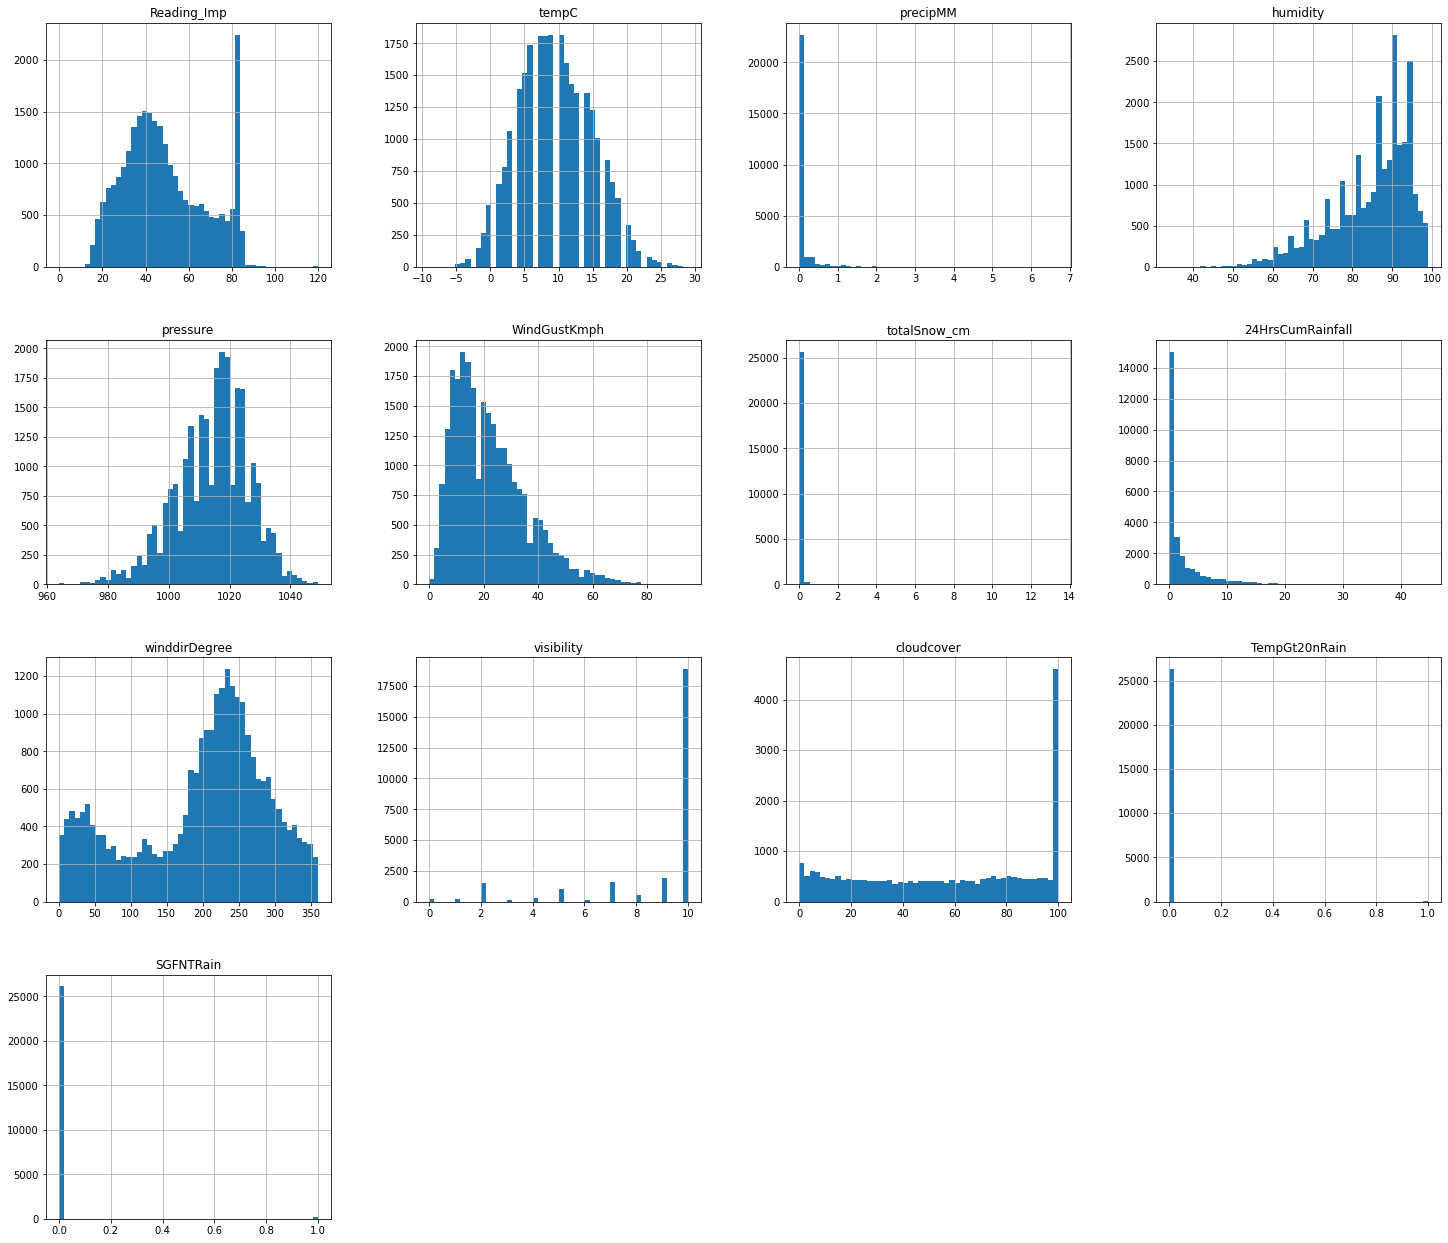

In [10]:
%matplotlib inline
X.hist(bins = 50, figsize=(25,22))
plt.show()

In [30]:
A2 = data[data['AssetID']== asset_list[1]].copy()
model2data = A2[['FullDate','Reading_Imp','tempC','precipMM','humidity','pressure','WindGustKmph','totalSnow_cm','24HrsCumRainfall',
               'winddirDegree', 'visibility', 'cloudcover', 'TempGt20nRain','SGFNTRain']
                ].copy()
X2=model2data.iloc[:, 1:]
X2.head()

,Reading_Imp,tempC,precipMM,humidity,pressure,WindGustKmph,totalSnow_cm,24HrsCumRainfall,winddirDegree,visibility,cloudcover,TempGt20nRain,SGFNTRain
26304,4.8900,11,0.0,87,993,53,0.0,3.0,217,10,100,0,0
26305,6.6775,11,0.0,84,992,56,0.0,3.0,215,9,86,0,0
26306,6.6250,11,0.9,80,991,58,0.0,3.8,214,8,71,0,0
26307,6.5300,11,1.2,77,991,61,0.0,4.9,212,7,57,0,0
26308,6.3225,10,0.6,77,991,63,0.0,5.5,212,8,46,0,0


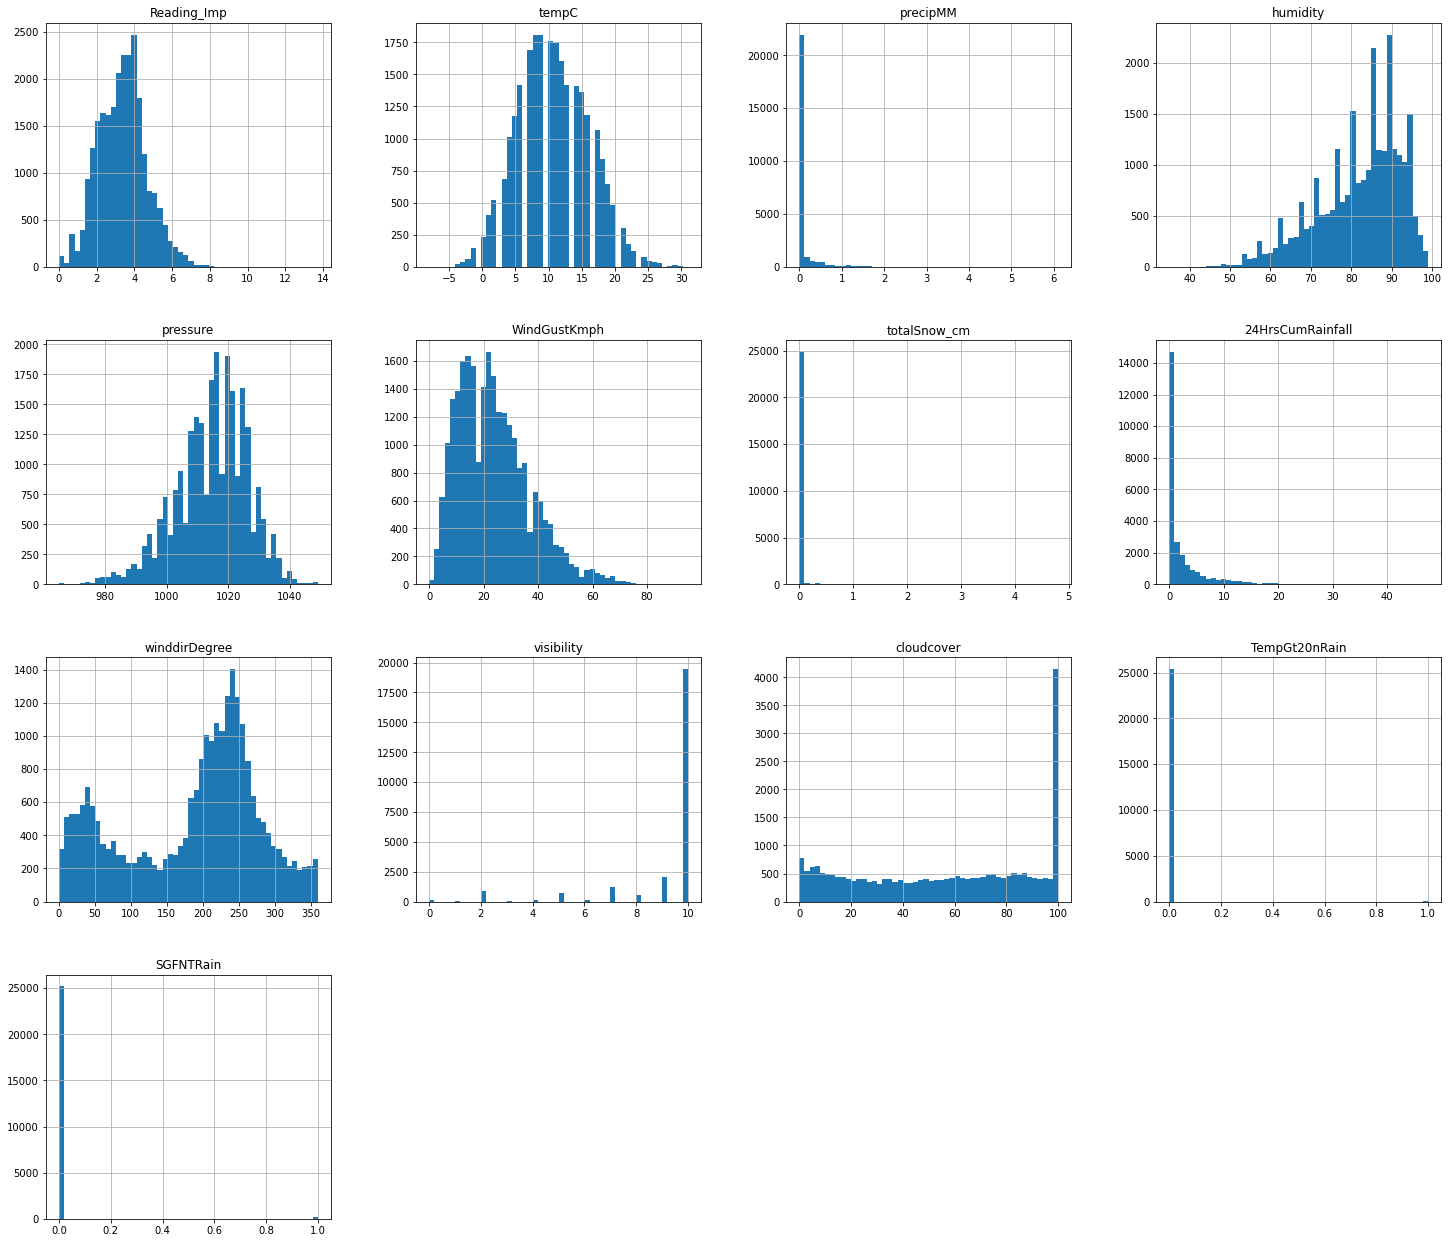

In [31]:
%matplotlib inline
X2.hist(bins = 50, figsize=(25,22))
plt.show()

In [32]:
A3 = data[data['AssetID']== asset_list[2]].copy()
model3data = A3[['FullDate','Reading_Imp','tempC','precipMM','humidity','pressure','WindGustKmph','totalSnow_cm','24HrsCumRainfall',
               'winddirDegree', 'visibility', 'cloudcover', 'TempGt20nRain','SGFNTRain']
                ].copy()
X3=model3data.iloc[:, 1:]
X3.head()

,Reading_Imp,tempC,precipMM,humidity,pressure,WindGustKmph,totalSnow_cm,24HrsCumRainfall,winddirDegree,visibility,cloudcover,TempGt20nRain,SGFNTRain
51684,24.2525,5,0.0,92,1034,22,0.0,0.0,266,10,35,0,0
51685,21.2150,6,0.0,92,1034,24,0.0,0.0,270,10,45,0,0
51686,22.0275,6,0.0,93,1034,27,0.0,0.0,275,10,55,0,0
51687,19.8850,6,0.0,93,1034,30,0.0,0.0,279,10,65,0,0
51688,20.3925,6,0.0,93,1034,28,0.0,0.0,283,10,75,0,0


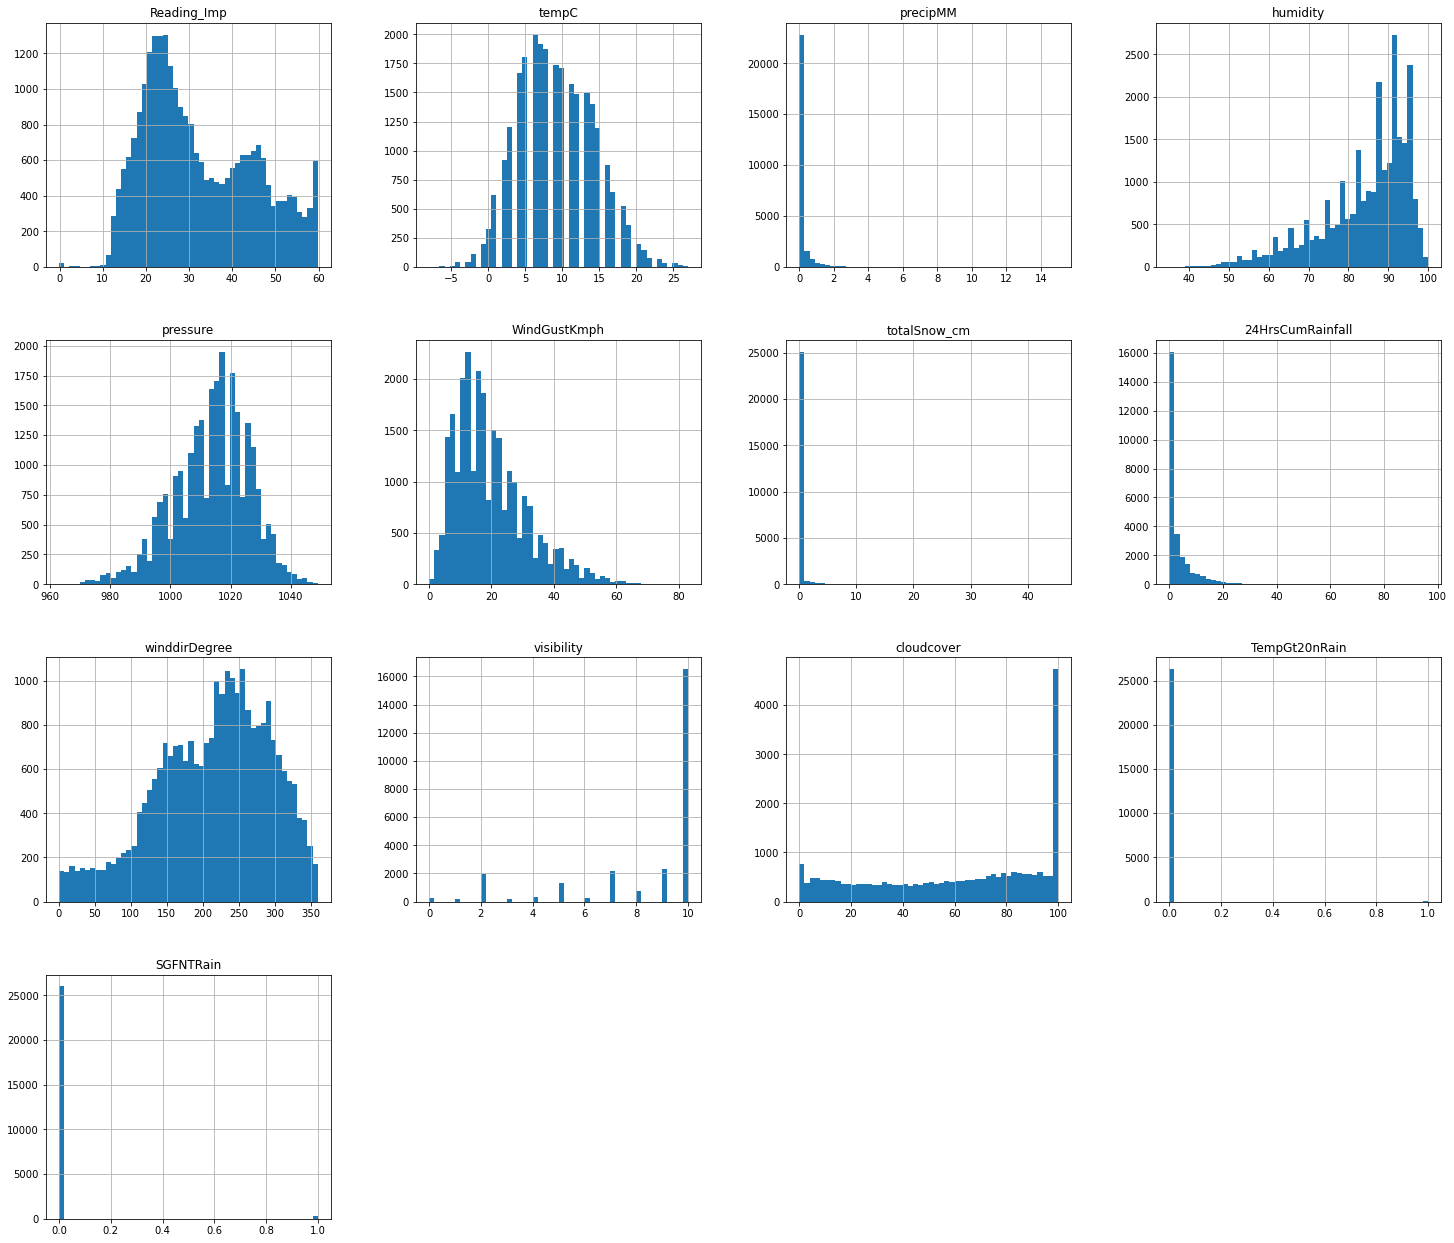

In [33]:
%matplotlib inline
X3.hist(bins = 50, figsize=(25,22))
plt.show()

In [34]:
A4 = data[data['AssetID']== asset_list[3]].copy()
model4data = A4[['FullDate','Reading_Imp','tempC','precipMM','humidity','pressure','WindGustKmph','totalSnow_cm','24HrsCumRainfall',
               'winddirDegree', 'visibility', 'cloudcover', 'TempGt20nRain','SGFNTRain']
                ].copy()
X4=model4data.iloc[:, 1:]
X4.head()

,Reading_Imp,tempC,precipMM,humidity,pressure,WindGustKmph,totalSnow_cm,24HrsCumRainfall,winddirDegree,visibility,cloudcover,TempGt20nRain,SGFNTRain
77988,1.03725,6,0.0,95,1035,15,0.0,0.0,256,2,84,0,0
77989,1.02825,6,0.0,95,1035,15,0.0,0.0,260,2,88,0,0
77990,1.03050,6,0.0,95,1034,15,0.0,0.0,265,2,92,0,0
77991,1.03525,6,0.0,95,1034,14,0.0,0.0,269,2,95,0,0
77992,1.02575,7,0.0,96,1035,13,0.0,0.0,269,1,97,0,0


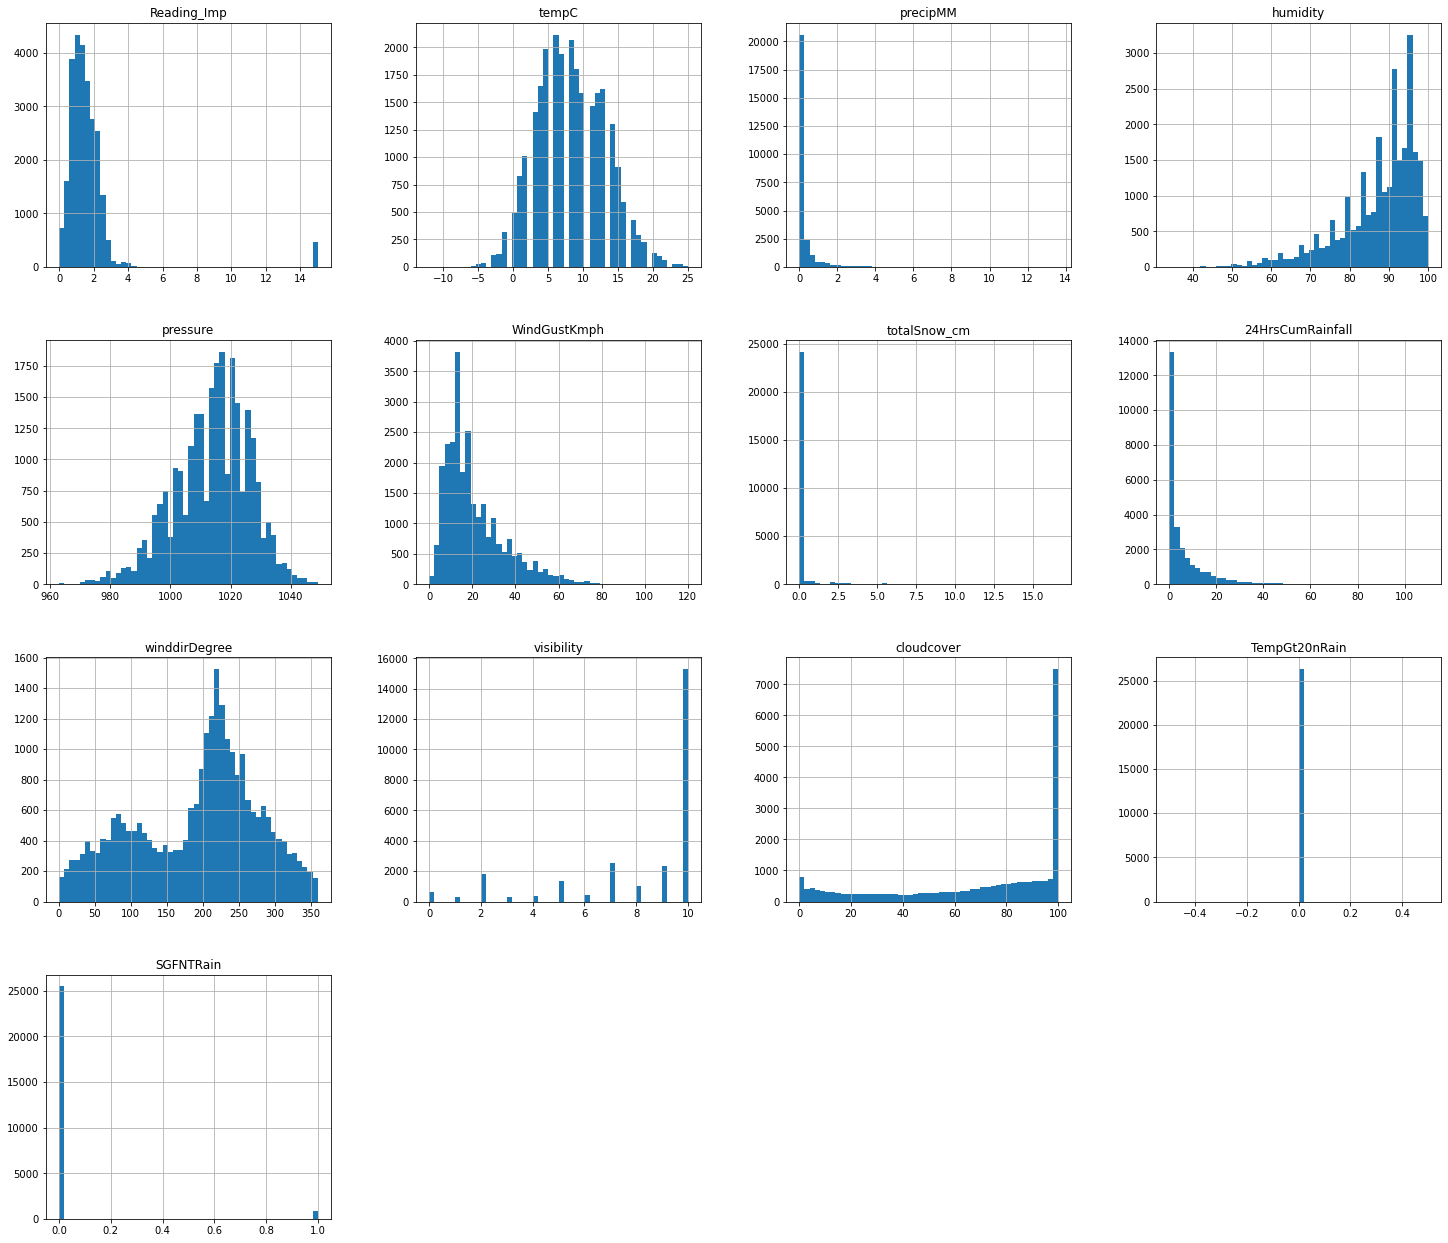

In [35]:
%matplotlib inline
X4.hist(bins = 50, figsize=(25,22))
plt.show()

## Asset 1 Model with Standard Scaled Data

In [11]:
scaler = StandardScaler()
data_scaled1 = scaler.fit_transform(X)
#     print(data_scaled.columns)
X_scaled = pd.DataFrame(data_scaled1)

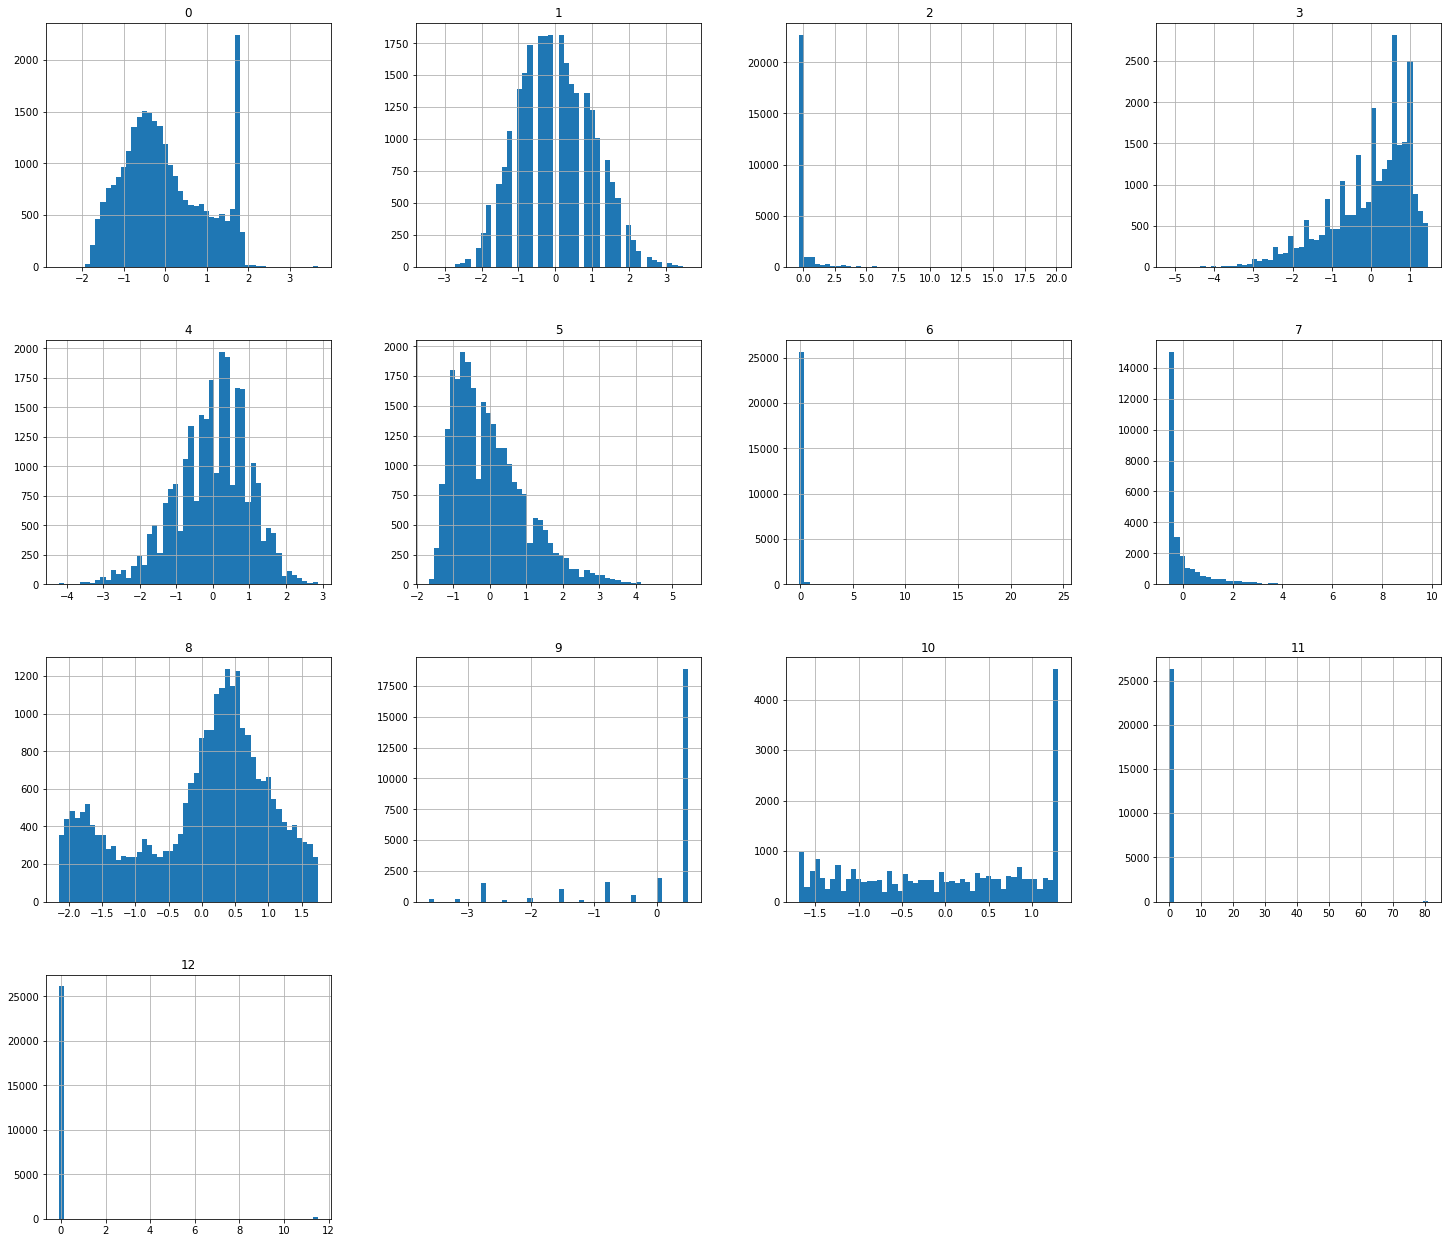

In [12]:
%matplotlib inline
X_scaled.hist(bins = 50, figsize=(25,22))
plt.show()

In [13]:
# # X=mod_df.iloc[:, 1:]
# pca = PCA(n_components=2)
# pca.fit(X)
# X_pca = pca.transform(X)

In [14]:
# pca.explained_variance_ratio_

In [15]:
clf = LocalOutlierFactor()
#n_neighbors=2
# y_pred = clf.fit_predict(X_pca)
y_pred = clf.fit_predict(X_scaled)

In [16]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [17]:
Counter(y_pred)
#-1 are anomalies, 1 are normal values

Counter({1: 26254, -1: 50})

In [18]:
# index = []
# for i in range(len(y_pred)):
#   if y_pred[i]!=1:
#     index.append(i)
# print("Outliers: ")
# for i in index:
#   print("Month",month[i]," Day", day[i])

In [19]:
df_array = modeldata[['FullDate','Reading_Imp']].to_numpy()
full_array = np.hstack((df_array,X))
# filter outlier index
# outlier_index = y_pred[y_pred == -1] # negative values are outliers and positives inliers
# # filter outlier values
# outlier_values = full_array[outlier_index]

lofs_index = np.where(y_pred!=1)
values = full_array[lofs_index]

In [20]:
# fig, ax1 = plt.subplots(figsize=(25, 20))

# ax2 = ax1.twinx()

# # plt.figure(figsize=(15, 12))
# ax1.scatter(modeldata['FullDate'], modeldata['Reading_Imp'], label="Normal")
# ax1.scatter(values[:,0],values[:,1], color='r', label="Outliers")
# ax2.plot(modeldata['FullDate'], modeldata['precipMM'], color='lime', label="Rainfall")
# ax1.legend()
# ax2.legend()
## plt.legend()
# # plt.xticks(modeldata['FullDate'],rotation=90)
# plt.show()

In [51]:
clf2 = LocalOutlierFactor(n_neighbors=35, contamination= 0.03, novelty=False)

In [ ]:
y_pred2 = clf2.fit_predict(X_scaled)

In [22]:
Counter(y_pred2)

Counter({1: 26191, -1: 113})

In [23]:
results = clf2.negative_outlier_factor_
modeldata['LOF'] = results.tolist()
modeldata

,FullDate,Reading_Imp,tempC,precipMM,humidity,pressure,WindGustKmph,totalSnow_cm,24HrsCumRainfall,winddirDegree,visibility,cloudcover,TempGt20nRain,SGFNTRain,LOF
0,2019-01-01 00:00:00,36.1550,5,0.0,93,1036,17,0.0,0.0,268,10,24,0,0,-1.031534
1,2019-01-01 01:00:00,35.8450,5,0.0,93,1036,18,0.0,0.0,271,10,24,0,0,-1.035302
2,2019-01-01 02:00:00,37.1800,5,0.0,93,1035,20,0.0,0.0,273,10,24,0,0,-1.017092
3,2019-01-01 03:00:00,29.7100,5,0.0,93,1035,22,0.0,0.0,276,10,24,0,0,-1.015734
4,2019-01-01 04:00:00,34.9025,5,0.0,93,1035,22,0.0,0.0,278,10,24,0,0,-1.005677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26299,2021-12-31 19:00:00,51.9800,12,0.0,88,1018,31,0.0,4.0,222,10,93,0,0,-1.049336
26300,2021-12-31 20:00:00,49.1500,12,0.0,87,1018,32,0.0,3.9,217,10,96,0,0,-1.051741
26301,2021-12-31 21:00:00,52.9250,12,0.0,87,1018,34,0.0,3.8,213,10,100,0,0,-1.078329
26302,2021-12-31 22:00:00,48.4700,12,0.0,89,1018,32,0.0,3.8,206,10,94,0,0,-1.037295


No handles with labels found to put in legend.


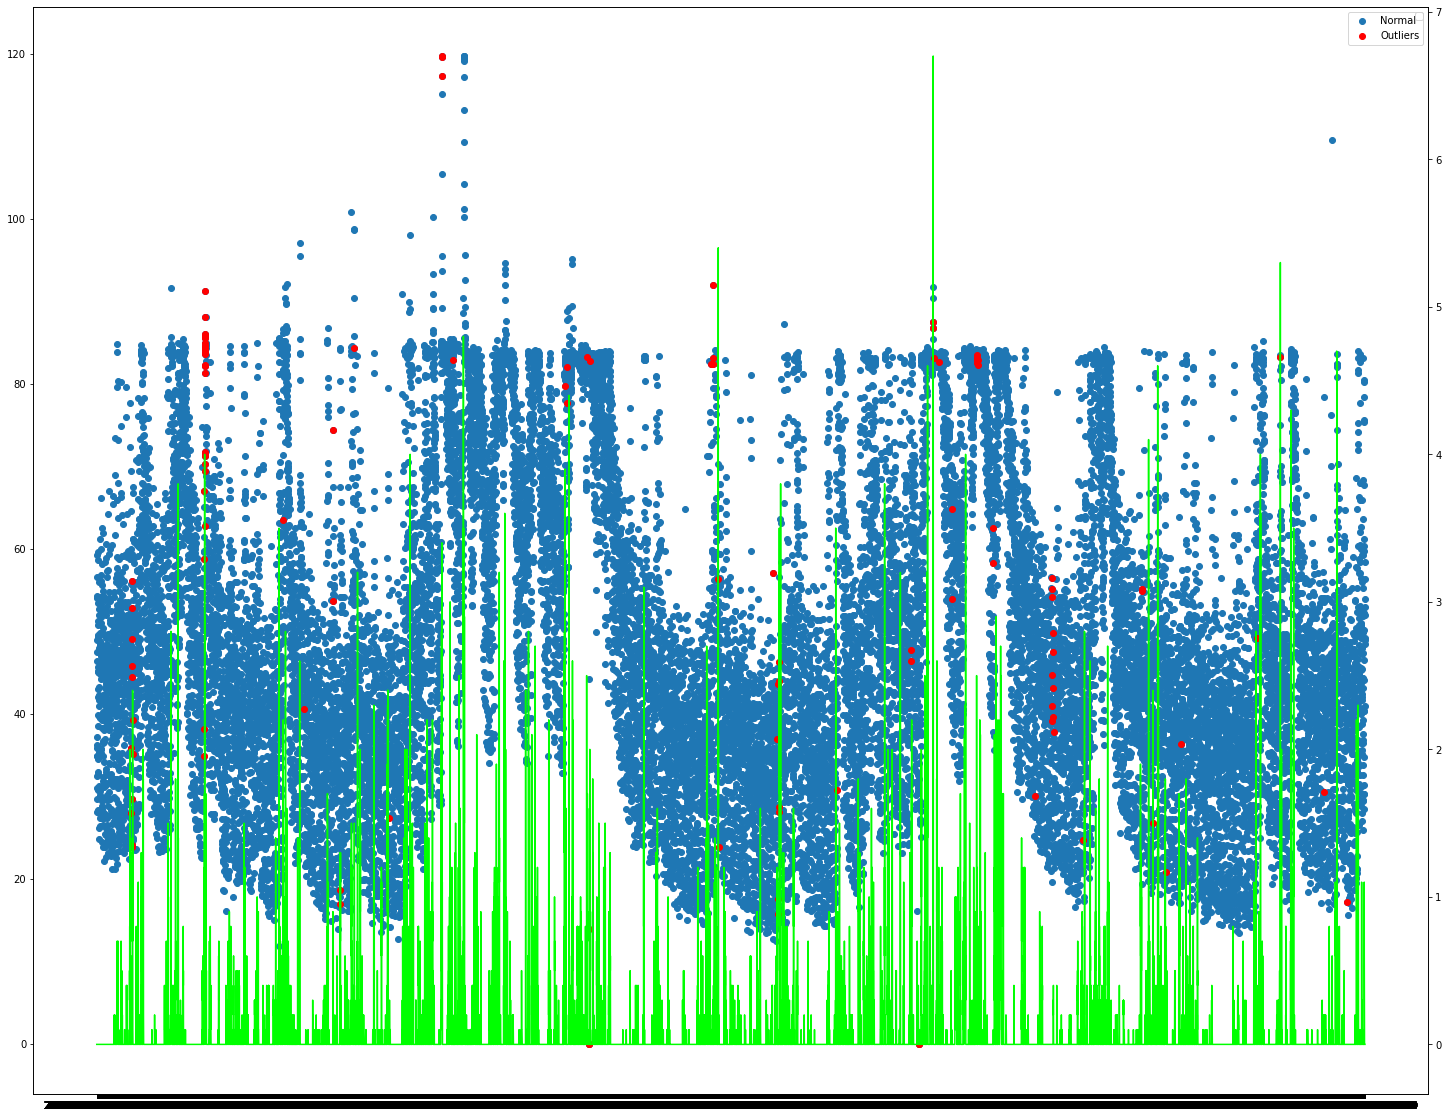

In [24]:
lofs_index2 = np.where(y_pred2!=1)
values2 = full_array[lofs_index2]

fig, ax1 = plt.subplots(figsize=(25, 20))
ax2 = ax1.twinx()
ax1.scatter(modeldata['FullDate'], modeldata['Reading_Imp'], label="Normal")
ax1.scatter(values2[:,0],values2[:,1], color='r', label="Outliers")
ax2.plot(modeldata['FullDate'], modeldata['precipMM'], color='lime')
ax1.legend()
ax2.legend(loc=0)
plt.show()

In [25]:
# plt.scatter(modeldata.FullDate, modeldata.Reading_Imp, c='black', s=modeldata.LOF * -1,label="Data Points")
# radius = (results.max() - results) / (results.max() - results.min())
# plt.scatter(modeldata.FullDate, modeldata.Reading_Imp, s=500 * radius,edgecolors="r",facecolors="none",label="Outlier scores",)
# legend = plt.legend(loc="upper left")
# legend.legendHandles[0]._sizes = [10]
# legend.legendHandles[1]._sizes = [20]
# plt.show()

In [26]:
modeldata.to_csv("LOFOutput_A1.csv", index=False)

## <font color='blue'>Asset 1 Model with Robust Scaler</font>

In [28]:
trans = RobustScaler()
data_trans1 = trans.fit_transform(X)
#     print(data_scaled.columns)
X_transscaled = pd.DataFrame(data_scaled1)

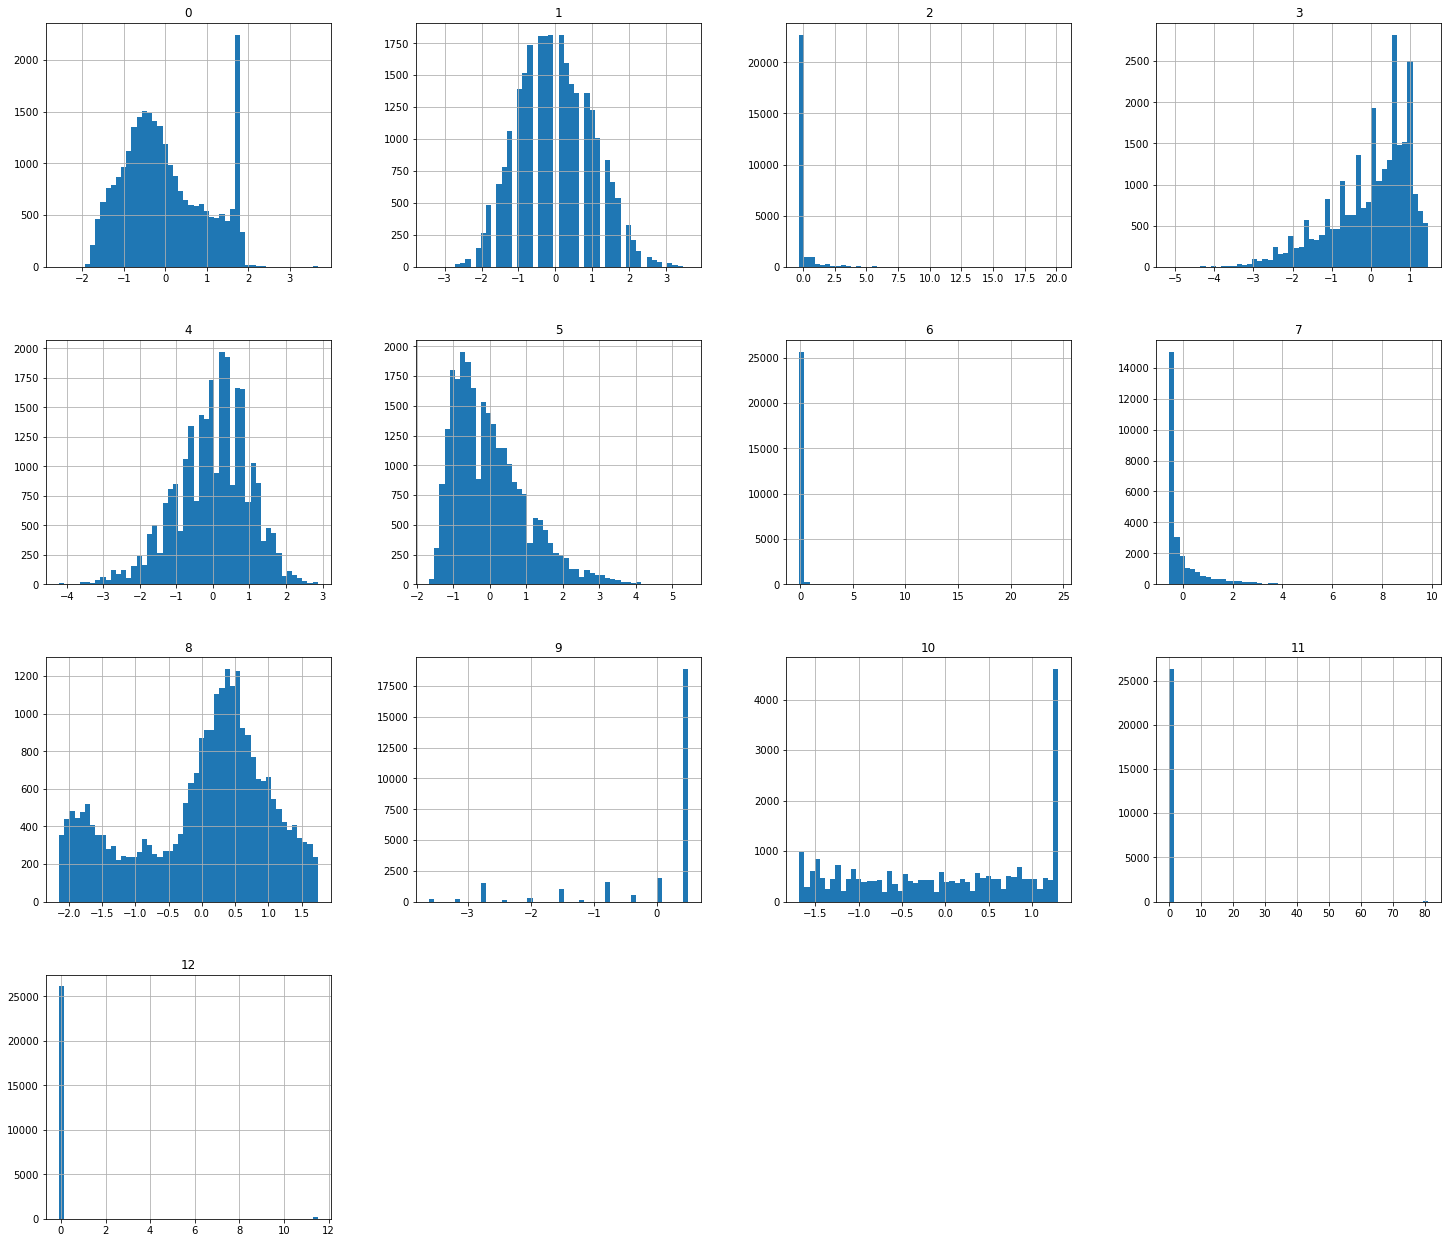

In [29]:
%matplotlib inline
X_transscaled.hist(bins = 50, figsize=(25,22))
plt.show()

In [36]:
# clf2 = LocalOutlierFactor(n_neighbors=50)
y_pred3 = clf2.fit_predict(X_transscaled)

In [37]:
Counter(y_pred3)

Counter({1: 26191, -1: 113})

In [38]:
results3 = clf2.negative_outlier_factor_
modeldata['LOF2'] = results.tolist()
modeldata

,FullDate,Reading_Imp,tempC,precipMM,humidity,pressure,WindGustKmph,totalSnow_cm,24HrsCumRainfall,winddirDegree,visibility,cloudcover,TempGt20nRain,SGFNTRain,LOF,LOF2
0,2019-01-01 00:00:00,36.1550,5,0.0,93,1036,17,0.0,0.0,268,10,24,0,0,-1.031534,-1.031534
1,2019-01-01 01:00:00,35.8450,5,0.0,93,1036,18,0.0,0.0,271,10,24,0,0,-1.035302,-1.035302
2,2019-01-01 02:00:00,37.1800,5,0.0,93,1035,20,0.0,0.0,273,10,24,0,0,-1.017092,-1.017092
3,2019-01-01 03:00:00,29.7100,5,0.0,93,1035,22,0.0,0.0,276,10,24,0,0,-1.015734,-1.015734
4,2019-01-01 04:00:00,34.9025,5,0.0,93,1035,22,0.0,0.0,278,10,24,0,0,-1.005677,-1.005677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26299,2021-12-31 19:00:00,51.9800,12,0.0,88,1018,31,0.0,4.0,222,10,93,0,0,-1.049336,-1.049336
26300,2021-12-31 20:00:00,49.1500,12,0.0,87,1018,32,0.0,3.9,217,10,96,0,0,-1.051741,-1.051741
26301,2021-12-31 21:00:00,52.9250,12,0.0,87,1018,34,0.0,3.8,213,10,100,0,0,-1.078329,-1.078329
26302,2021-12-31 22:00:00,48.4700,12,0.0,89,1018,32,0.0,3.8,206,10,94,0,0,-1.037295,-1.037295


No handles with labels found to put in legend.


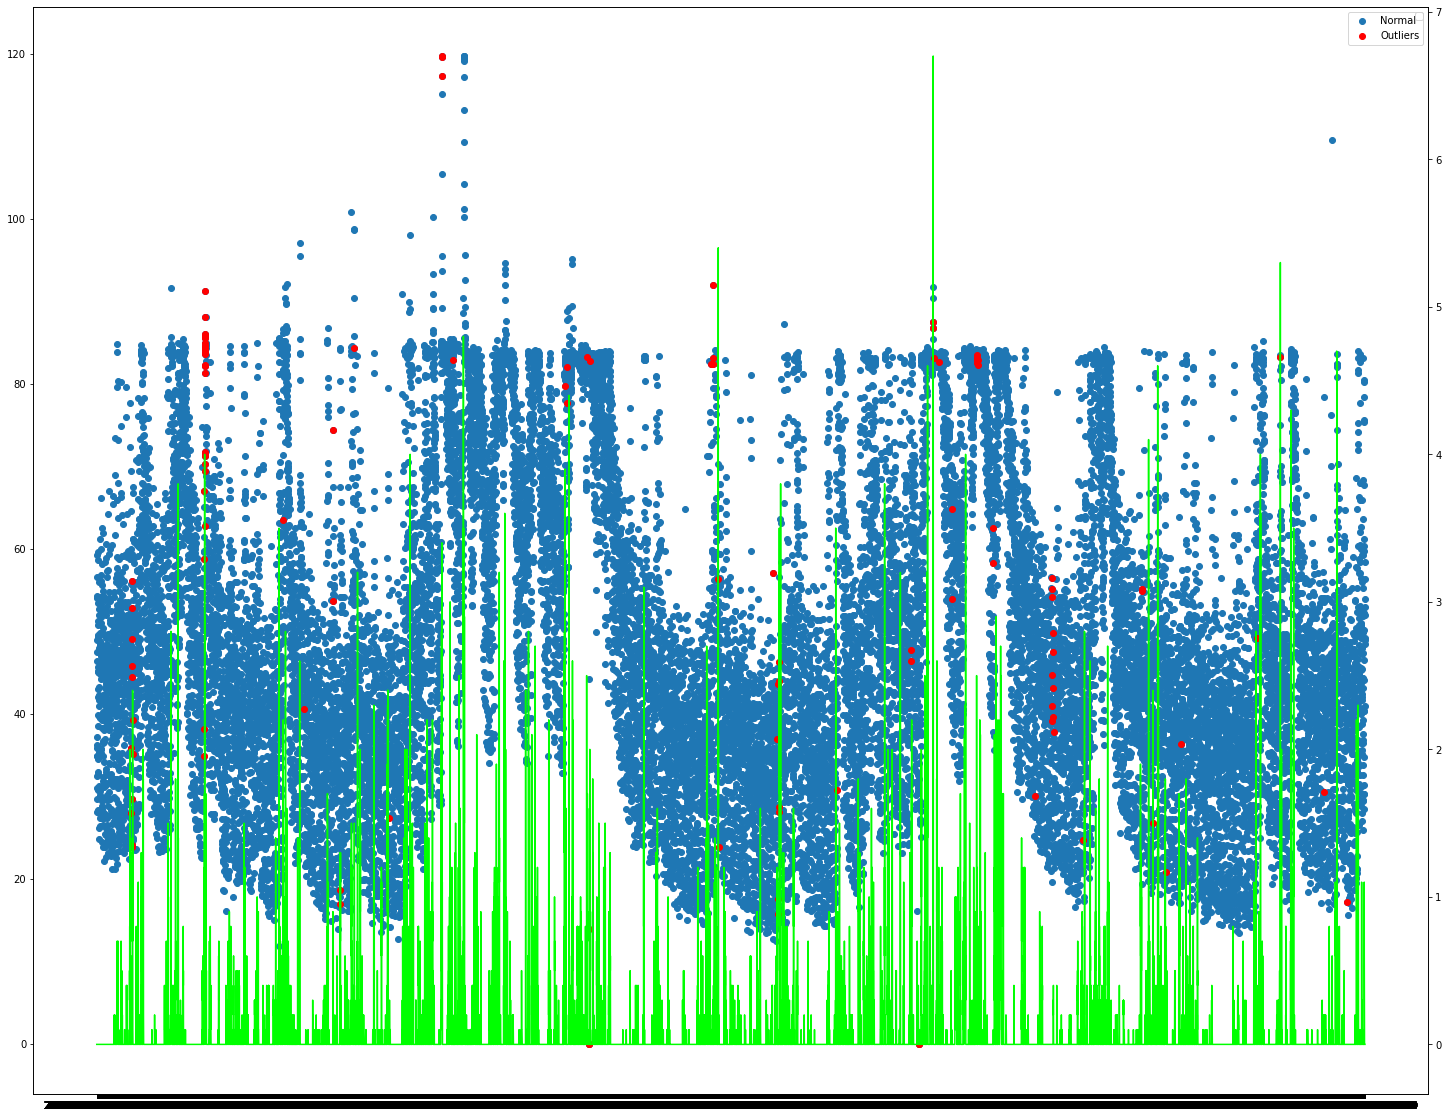

In [39]:
lofs_index3 = np.where(y_pred3!=1)
values3 = full_array[lofs_index3]

fig, ax1 = plt.subplots(figsize=(25, 20))
ax2 = ax1.twinx()
ax1.set_title("Telemtry Readings and Rainfall of Asset 1E09474")
ax1.scatter(modeldata['FullDate'], modeldata['Reading_Imp'], label="Normal")
ax1.scatter(values3[:,0],values3[:,1], color='r', label="Outliers")
ax2.plot(modeldata['FullDate'], modeldata['precipMM'], color='lime')
ax1.legend()
ax2.legend(loc = 2)
ax1.set_ylabel('Telemetry Readings')
ax2.set_ylabel('Rainfall in mm')
plt.show()

In [52]:
# clf2 = LocalOutlierFactor(n_neighbors=50)
y_pred4 = clf2.fit_predict(X_transscaled)

In [53]:
Counter(y_pred4)

Counter({1: 25514, -1: 790})

In [55]:
values4

array([['2019-01-04 03:00:00', 27.3725, 27.3725, ..., 4.0, 0.0, 0.0],
       ['2019-01-06 07:00:00', 31.865, 31.865, ..., 57.0, 0.0, 0.0],
       ['2019-01-06 11:00:00', 54.84, 54.84, ..., 24.0, 0.0, 0.0],
       ...,
       ['2021-12-19 05:00:00', 21.75, 21.75, ..., 18.0, 0.0, 0.0],
       ['2021-12-29 14:00:00', 47.970000000000006, 47.970000000000006,
        ..., 39.0, 0.0, 0.0],
       ['2021-12-29 15:00:00', 42.435, 42.435, ..., 12.0, 0.0, 0.0]],
      dtype=object)

In [56]:
lofs_index4 = np.where(y_pred4!=1)
values4 = full_array[lofs_index4]
df4 = pd.DataFrame(values4)
df4

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,2019-01-04 03:00:00,27.3725,27.3725,0.0,0.0,90.0,1043.0,3.0,0.0,0.0,358.0,10.0,4.0,0.0,0.0
1,2019-01-06 07:00:00,31.865,31.865,3.0,0.0,94.0,1037.0,17.0,0.0,0.0,285.0,7.0,57.0,0.0,0.0
2,2019-01-06 11:00:00,54.84,54.84,5.0,0.0,89.0,1037.0,11.0,0.0,0.0,286.0,7.0,24.0,0.0,0.0
3,2019-01-18 11:00:00,53.189997,53.189997,4.0,0.5,78.0,1013.0,38.0,0.0,0.5,160.0,9.0,100.0,0.0,0.0
4,2019-01-18 13:00:00,48.7025,48.7025,4.0,0.3,82.0,1011.0,41.0,0.0,1.4,160.0,9.0,100.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785,2021-12-16 05:00:00,17.2,17.2,6.0,0.0,93.0,1035.0,6.0,0.0,0.0,269.0,7.0,15.0,0.0,0.0
786,2021-12-18 15:00:00,41.1625,41.1625,8.0,0.0,94.0,1040.0,13.0,0.0,0.0,34.0,10.0,61.0,0.0,0.0
787,2021-12-19 05:00:00,21.75,21.75,4.0,0.0,94.0,1036.0,9.0,0.0,0.0,239.0,7.0,18.0,0.0,0.0
788,2021-12-29 14:00:00,47.97,47.97,12.0,0.0,83.0,998.0,61.0,0.0,3.9,255.0,7.0,39.0,0.0,0.0


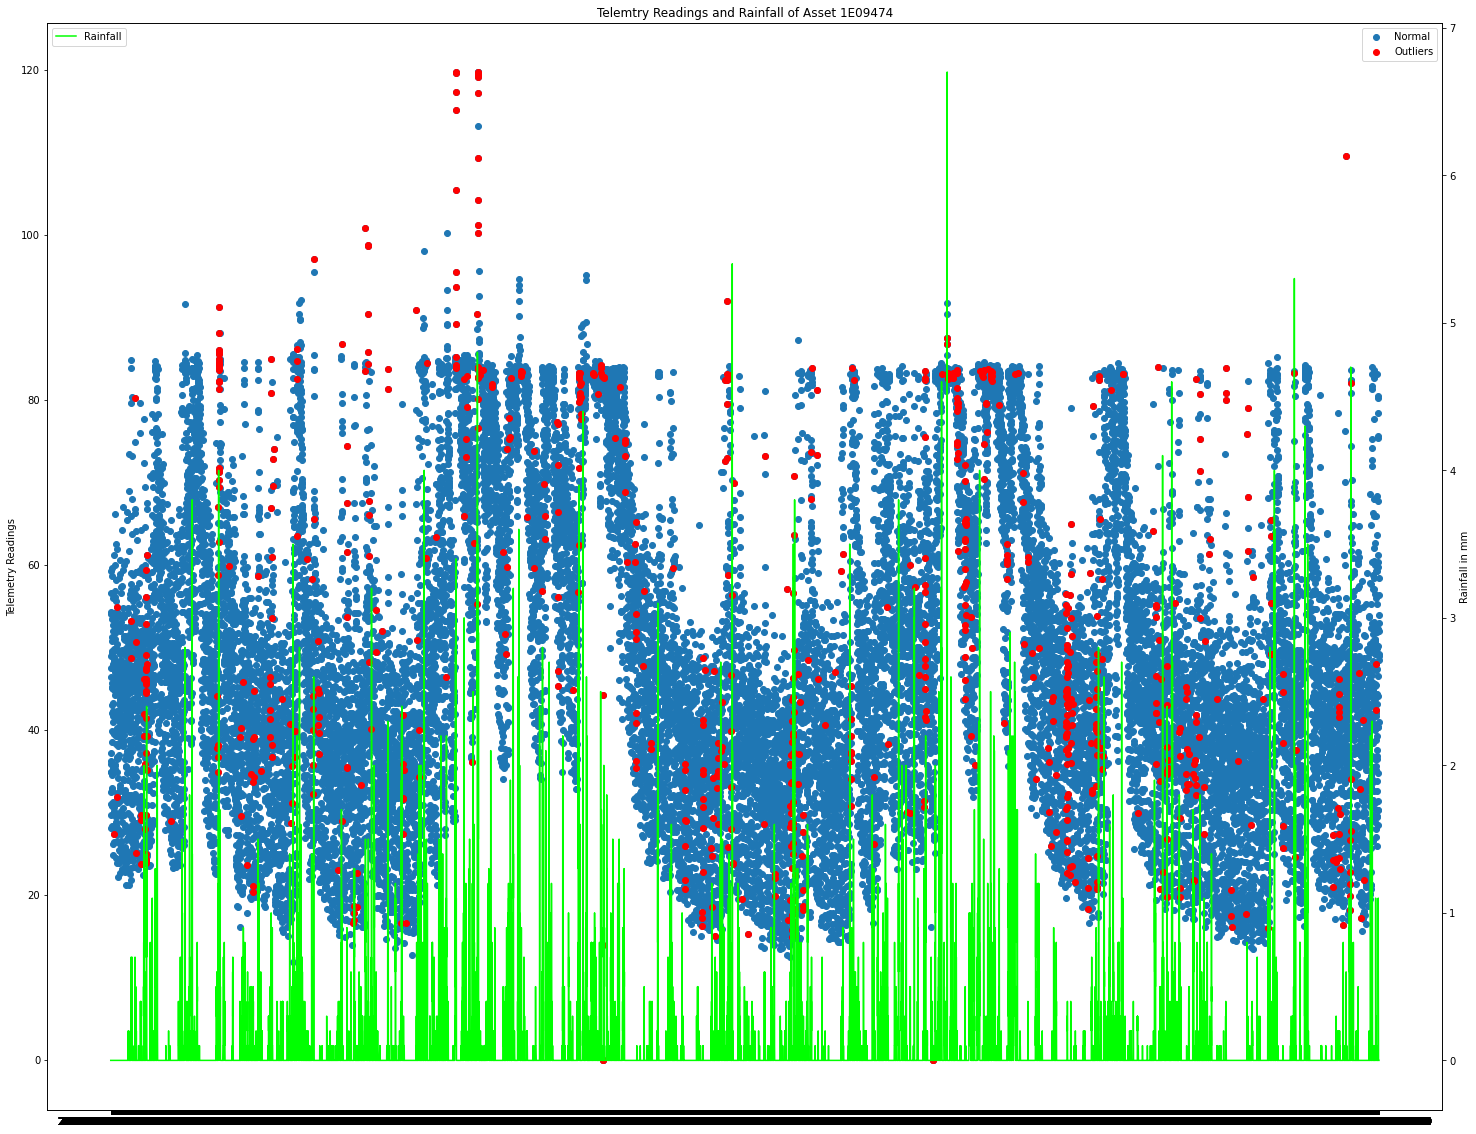

In [58]:
fig, ax1 = plt.subplots(figsize=(25, 20))
ax1.set_title("Telemtry Readings and Rainfall of Asset 1E09474")
ax2 = ax1.twinx()
ax1.scatter(modeldata['FullDate'], modeldata['Reading_Imp'], label="Normal")
ax1.scatter(df4[0],df4[1], color='r', label="Outliers")
ax2.plot(modeldata['FullDate'], modeldata['precipMM'], color='lime', label="Rainfall")
ax1.legend()
ax2.legend(loc = 2)
ax1.set_ylabel('Telemetry Readings')
ax2.set_ylabel('Rainfall in mm')
plt.show()